# ATP Match Predictor (Final Project for INFO 1998: Intro to Machine Learning)

Combining two passions of mine, tennis and data science, this project aims to predict tennis match results based off of commonly accessible statistics. I will use a number of statistical methods to quantitatively predict the winner of a tennis match. This will include data visualizations to aid in the understanding and interpretation of the data, and to impove the performance of the models.

The data is from the 2016 season of the ATP World Tour and can be found here: https://www.kaggle.com/gmadevs/atp-matches-dataset#atp_matches_2016.csv

# Data Preprocessing and Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
%matplotlib inline

#Import dataset
df_raw=pd.read_csv('2016_atp_matches.csv') 
df_raw.head()

,tourney_name,surface,draw_size,tourney_date,seed,name,hand,ht,age,rank,...,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,result
0,Brisbane,Hard,32.0,20160104.0,4.0,Milos Raonic,R,196.0,25.021218,14.0,...,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,W
1,Brisbane,Hard,32.0,20160104.0,1.0,Roger Federer,R,185.0,34.406571,3.0,...,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,W
2,Brisbane,Hard,32.0,20160104.0,4.0,Milos Raonic,R,196.0,25.021218,14.0,...,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,W
3,Brisbane,Hard,32.0,20160104.0,1.0,Roger Federer,R,185.0,34.406571,3.0,...,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,W
4,Brisbane,Hard,32.0,20160104.0,8.0,Dominic Thiem,R,NaN,22.335387,20.0,...,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,W


The first few rows of the raw data can be seen above. However, before beginning analysis, we must clean the raw data to suit our needs. Many columns such as the tournament name and player name are uneccessary for analysis, and should be removed. Additionally, variables that would be in common between two players such as the court surface, match date, and match length are also removed. Below, the cleaned dataset is shown.

In [2]:
#Removing uneccessary columns
df=df_raw.drop(columns=['draw_size', 'hand', 'svpt', 'tourney_name','name','score','surface','round','SvGms', 'tourney_date','minutes','best_of'])
df.head()

,seed,ht,age,rank,rank_points,ace,df,1stIn,1stWon,2ndWon,bpSaved,bpFaced,result
0,4.0,196.0,25.021218,14.0,2170.0,6.0,6.0,34.0,28.0,14.0,1.0,1.0,W
1,1.0,185.0,34.406571,3.0,8265.0,6.0,0.0,27.0,23.0,12.0,0.0,1.0,W
2,4.0,196.0,25.021218,14.0,2170.0,13.0,3.0,49.0,40.0,19.0,4.0,4.0,W
3,1.0,185.0,34.406571,3.0,8265.0,7.0,1.0,52.0,45.0,19.0,0.0,1.0,W
4,8.0,NaN,22.335387,20.0,1600.0,6.0,0.0,55.0,41.0,20.0,0.0,2.0,W


# Problem and Hypothesis

The main goal of this project was to develop potential machine learning models for predicting the winner of a tennis match.

I hypothesize that using the differences between the winner and loser with respect to the values in the above dataframe can be used to produce an accurate model (~90% accuracy).

# Visualizations (Density Plot and 2D Scatter Plot)

We began by examining two parameters that I believe will be critical for the planned models. This allows us to gain some insight into the parameters and view certain statistical characteristics of the distributions.

### Winner and Loser Rankings

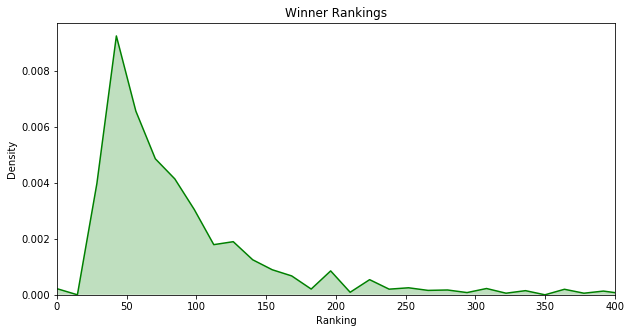

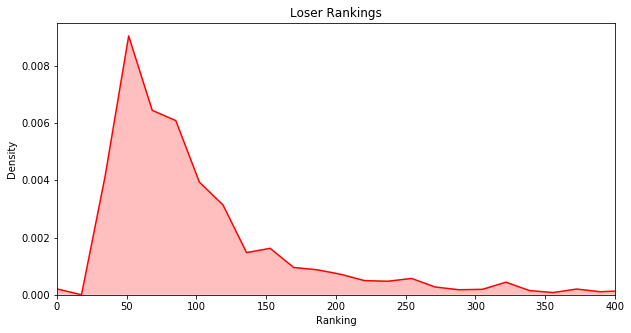

In [3]:
#Drop rows with NaN rankings 
dfDensity=df.dropna(subset=['rank'])

#Winner Rankings
plt.figure(figsize=(10,5))
dfW=dfDensity[dfDensity.result!='L']
density = sns.kdeplot(dfW['rank'],shade=True, legend=False, bw=.1, color='g')
plt.title ('Winner Rankings')
plt.xlabel('Ranking')
plt.ylabel('Density')
plt.xlim(0, 400)
plt.show()

#Loser Rankings
plt.figure(figsize=(10,5))
dfL=dfDensity[dfDensity.result!='W']
density = sns.kdeplot(dfL['rank'],shade=True, legend=False, bw=.1, color='r')
plt.title ('Loser Rankings')
plt.xlabel('Ranking')
plt.ylabel('Density')
plt.xlim(0, 400)
plt.show()

These density plots help us visualize the distribution of rankings for the winners and losers of each match. There does seem to be a slight difference in the two plots, with the distribution of loser rankings very slightly lower than the distribution of winner rankings.

Interestingly, this distribution also shows that the top players do not play as many matches, presumably because they go deeper in tournaments and earn more prize money. Mid ranked players play the most matches. And lower ranked players are not accounted for because they often play on the Challenger Tour (one tier down from the top-tier ATP World Tour).

### Winner and Loser Break Point Performance

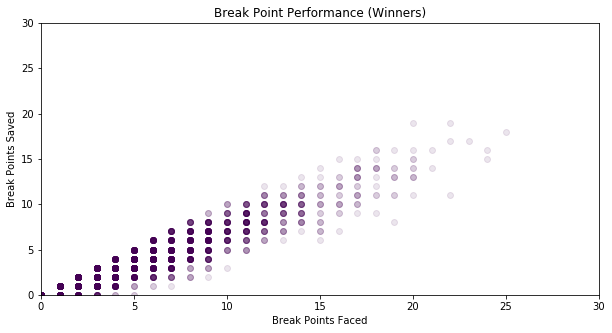

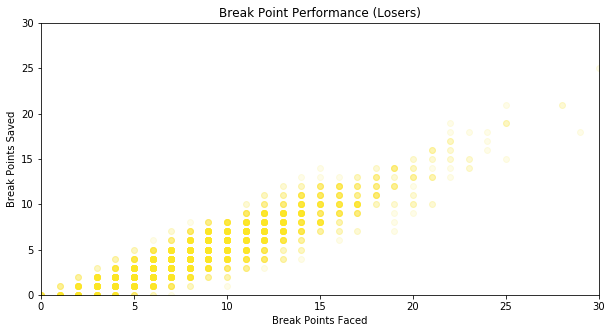

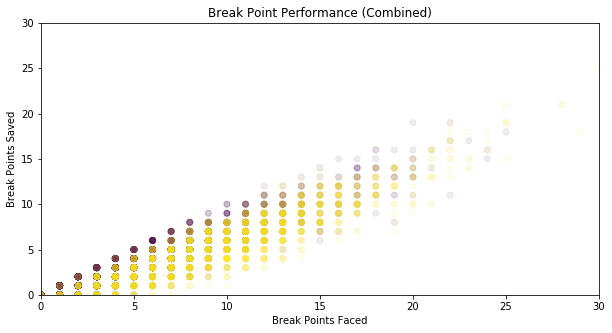

In [4]:
#Winners plot
plt.figure(figsize=(10,5))
plt.scatter(dfW['bpFaced'],dfW['bpSaved'],c='#440154', alpha = .1) 
plt.title('Break Point Performance (Winners)')
plt.xlabel('Break Points Faced')
plt.ylabel('Break Points Saved')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

#Losers plot
plt.figure(figsize=(10,5))
plt.scatter(dfL['bpFaced'],dfL['bpSaved'],c='#FCE625', alpha = .1) 
plt.title('Break Point Performance (Losers)')
plt.xlabel('Break Points Faced')
plt.ylabel('Break Points Saved')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

#Combined plot
plt.figure(figsize=(10,5))
df['bin_result'] = pd.factorize(df.result)[0]
plt.scatter(df['bpFaced'],df['bpSaved'],c=df['bin_result'].values.ravel(), alpha = .075) 
plt.title('Break Point Performance (Combined)')
plt.xlabel('Break Points Faced')
plt.ylabel('Break Points Saved')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In the sport of tennis, winning a break point and "breaking" your opponent is a common indicator for match success. A player is usually expected to hold their serve because serving is an advantage. Thus, if a player is broken, then they are likely to lose the match.

From these scatterplots, we can see that winners face less break points and most importantly, save more of them. This follows my hypothesis and the conventional wisdom of tennis players.

# Machine Learning Models

Now we must decide which predictors to use for our models. The critical point here is that we use the _difference_ between corresponding statistics between the winner and loser. Thus, for our models, we can use seed difference, height difference, age difference, rank difference, rank points difference, ace difference, double fault difference, 1st serve percentage difference, 1st serve points won difference, 2nd serve points won difference, break points faced difference, and break points saved difference.

I then constructed a new dataframe with these differences.

In [5]:
#New dataframe
new_array = []
for row in range (3004):
    arr = []
    for col in range (12):
        arr.append(df.iat[row, col]-df.iat[row+3004, col])
    new_array.append(arr)
for x in range (len(new_array)):
    arr = []
    for y in range (len(new_array[x])):
        arr.append(-1 * new_array[x][y])
    new_array.append(arr)
df_new = pd.DataFrame(new_array, columns = ['seed_diff', 'ht_diff', 'age_diff',
                                            'rank_diff', 'rank_points_diff', 'ace_diff', 
                                            'df_diff', '1stIn_diff', '1stWon_diff', '2ndWon_diff', 
                                            'bpSaved_diff', 'bpFaced_diff'])

#Drop rows that have NaN (this causes an error when attempting to fit a model)
df_new['result'] = df['result']
df_new = df_new.dropna()
X = df_new.drop('result', axis=1)
Y = df_new['result']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
df_new.head()

,seed_diff,ht_diff,age_diff,rank_diff,rank_points_diff,ace_diff,df_diff,1stIn_diff,1stWon_diff,2ndWon_diff,bpSaved_diff,bpFaced_diff,result
0,3.0,11.0,-9.385352,11.0,-6095.0,-1.0,3.0,0.0,3.0,0.0,-2.0,-4.0,W
2,-3.0,3.0,1.817933,-4.0,495.0,3.0,0.0,-5.0,-1.0,3.0,2.0,2.0,W
6,5.0,15.0,-2.811773,10.0,-2560.0,9.0,-2.0,10.0,10.0,-2.0,1.0,1.0,W
28,-2.0,-13.0,4.112252,-15.0,5232.0,4.0,-2.0,8.0,2.0,7.0,-1.0,-3.0,W
30,-4.0,-5.0,-1.815195,-23.0,5435.0,9.0,-2.0,-6.0,5.0,-8.0,-6.0,-8.0,W


Now that we have constructed a new dataframe (above) with the differences between winner and loser, we can start implementing machine learning models to conduct predictive analysis. We will construct three separate classification models for the new dataset. They are the Logistic Regression Model, Decision Tree Classifier, and k-Nearest Neighbors Algorithm.

### Logistic Regression Model

A logistic regression model is a generalized linear model and it uses a logisitic function to model a binary dependent variable. Since the final output is binary, this means this model should be applicable to our dataset since the final result is either Win or Lose. The logistic regression model allows us to interpret the prediction as a probability that something is true.

In [6]:
df_new['result'] = df_new['result'] == 'W'
logRegModel = LogisticRegression()
logRegModel.fit(x_train, y_train)
prediction_train = logRegModel.predict(x_train)
prediction_test = logRegModel.predict(x_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, prediction_test))
pd.DataFrame({"Real Result":y_test, "Predicted Result":prediction_test}).reset_index(drop=True).head(10)

Logistic Regression Accuracy:  0.9387755102040817


,Real Result,Predicted Result
0,W,W
1,L,L
2,W,W
3,L,L
4,L,L
5,L,L
6,L,L
7,W,W
8,L,L
9,L,L


### Decision Tree Classifier

A decision tree algorithm can be used to perform classification as well. In particular, it can be advantageous because it does not assume a linear model. The model uses the data to construct a flowchart with a series of nodes and edges. The decision tree then breaks down the data by making a series of decisions and classifying at each point.  

In [7]:
decTreeModel = tree.DecisionTreeClassifier(max_depth=5)
decTreeModel.fit(x_train, y_train)
prediction_train = decTreeModel.predict(x_train)
prediction_test = decTreeModel.predict(x_test)
dTree_acc = accuracy_score(y_test, prediction_test)
print("Decision Tree Accuracy: ", dTree_acc)
pd.DataFrame({"Real Result":y_test, "Predicted Result":prediction_test}).reset_index(drop=True).head(10)

Decision Tree Accuracy:  0.8367346938775511


,Real Result,Predicted Result
0,W,W
1,L,L
2,W,W
3,L,L
4,L,L
5,L,L
6,L,L
7,W,W
8,L,L
9,L,L


### k-Nearest Neighbors Algorithm

Finally, a k-NN (k-nearest neighbors) algorithm can be used for classification as well. k-NN attempts to classify a dataset into a number of discrete categories. It operates under the assumption that values nearest to a data point are similar to it. 

In [8]:
knnModel = KNeighborsClassifier()
knnModel.fit(x_train, y_train)
prediction_train = knnModel.predict(x_train)
prediction_test = knnModel.predict(x_test)
knn_acc = accuracy_score(y_test, prediction_test)
print("k-NN Accuracy: ", knn_acc)
pd.DataFrame({"Real Result":y_test, "Predicted Result":prediction_test}).reset_index(drop=True).head(10)

k-NN Accuracy:  0.6428571428571429


,Real Result,Predicted Result
0,W,W
1,L,L
2,W,L
3,L,L
4,L,L
5,L,L
6,L,L
7,W,L
8,L,W
9,L,L


Based on these resulting scores, we can conclude that the logistic regression model was the most accurate. However, we can take some steps to try and optimize the decision tree and k-NN models.

### Optimizing the Decision Tree Classifier

Since the decision tree model relies on nodes at increasing depths to make decisions, this can lead to overfitting as the complexity increases. We started off with the default value of 5 (tree of max depth), but we can now test multiple trees of varying depths to try and find the optimal max depth for this dataset.

In [9]:
best_depth = 1 
best_accuracy = 0 
accuracy_list = []
for k in range(1,101):
    optimizedModel=tree.DecisionTreeClassifier(max_depth=k)
    optimizedModel.fit(x_train, y_train)
    optimizedPrediction = optimizedModel.predict(x_test)
    test_accuracy = accuracy_score(y_test, optimizedPrediction)
    accuracy_list.append(accuracy_score(optimizedPrediction, y_test))
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_depth = k
print("Optimal Depth: ", best_depth)
print("Optimal Accuracy: ", best_accuracy)
print("Original Accuracy:",dTree_acc)

Optimal Depth:  16
Optimal Accuracy:  0.9387755102040817
Original Accuracy: 0.8367346938775511


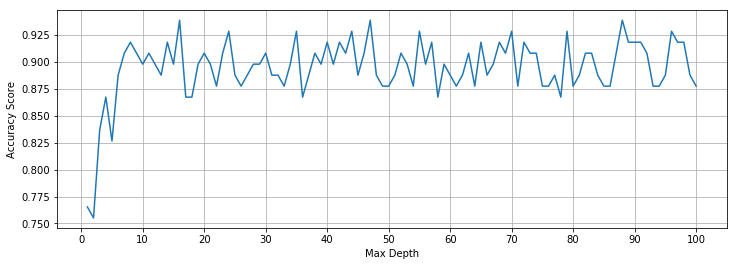

In [10]:
plt.figure(figsize=(12,4))
plt.plot(range(1,101), accuracy_list)
plt.xticks(range(0,101,10),range(0,101,10))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.grid()
plt.show()

Visualizing the accuracy at different depths, we can see that there was an increase in accuracy, meaning our optimized model was successful.

### Optimizing the k-NN Algorithm

The k-Nearest Neighbors algorithm works by choosing a data point and drawing a circle centered around it. It then increases the radius of the circle until k neighbors are enclosed by the circle. These neighbors are the k-nearest neighbors, hence the name. k-NN is also susceptible to overfitting, as expanding the radius of the circle can end up capturing too much data and lead to the model computing a value that just resembles the average.

Again, we can test different values of k and determine which k value gives the best accuracy.

In [11]:
best_k = 1 
best_accuracy = 0 
accuracy_list = []
for k in range(1,101):
    optimizedModel = KNeighborsClassifier(k)
    optimizedModel.fit(x_train, y_train)
    optimizedPrediction = optimizedModel.predict(x_test)
    test_accuracy = accuracy_score(y_test, optimizedPrediction)
    accuracy_list.append(accuracy_score(optimizedPrediction, y_test))
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k
print("Optimal Depth: ", best_k)
print("Optimal Accuracy: ", best_accuracy)
print("Original Accuracy: ",knn_acc)

Optimal Depth:  99
Optimal Accuracy:  0.7857142857142857
Original Accuracy:  0.6428571428571429


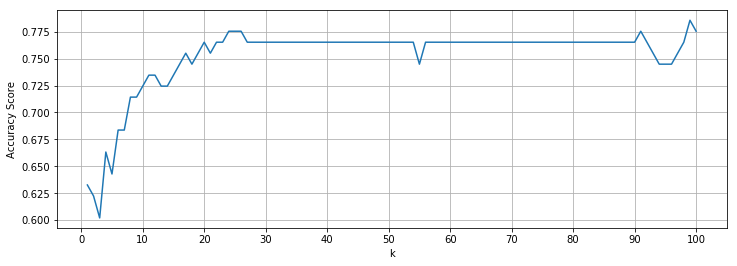

In [12]:
plt.figure(figsize=(12,4))
plt.plot(range(1,101), accuracy_list)
plt.xticks(range(0,101,10),range(0,101,10))
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.grid()
plt.show()

Similarly, we can visualize the accuracies at different k values. We can see that our optimizizations to the model have shown an increase in accuracy as well.